# DL Model on Greyhounds

This is just a demonstration of how to apply a tensorflow model to the greyhound data that has been scraped and we've applied cleaning and feature engineering to.

We will:

- Load data 
- Select our features 
- Split the data into training, validation and test data
- Add some extra features
- Reshaping the data
- Define Callbacks if we want them
- Define model architecture
- Train the Model
- Plot Accuracy / Precision
- Demonstrate how to predict


In [5]:
import warnings
warnings.filterwarnings('ignore')

import json

from datetime import datetime, timezone, timedelta

import sys



import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import pickle

# For scheduling
import sched
import time

pd.set_option('display.max_columns', None)

## Load Data

In [2]:
# Load
padded_df = pickle.load(open( "padded_greyhound.pkl", "rb" ))
print(padded_df.shape)
padded_df.head()

(134118, 85)


,datetime,trap,meetingId,trackName,race_date,grade,distance,raceId,raceGoing,name,is_female,dogId,calc_time,race_time,section_time,calc_section_time,remainder_time,calc_remainder_time,position,winner,comment,weight,trainerName,race_type,is_open_race,hurdle_race,missed_break,crowded,baulked,bumped,standard_time,normalised_time,no_runnners,normalised_position,sec_position,normalised_sec_position,races_count,ave_position,ave_distance,ave_missed_break,ave_crowded,ave_baulked,ave_bumped,ave_distance_placed,ave_dist_7,ave_position_7,std_position_7,ave_sec_position_7,std_sec_position_7,ave_time_7,min_time_7,std_time_7,msdbrk_7,crd_7,blk_7,bmp_7,ave_time_inc_tr_7,min_time_inc_tr_7,std_time_inc_tr_7,win_rate_all_time,win_rate_last_7,diff_time_last,diff_time_last_2,diff_time_last_shifted,stay_7,races_by_distance,win_pct_distance,ave_dist_position_7,std_dist_position_7,ave_dist_sec_position_7,std_dist_sec_position_7,ave_dist_time_7,min_dist_time_7,std_dist_time_7,msdbrk_dist_7,crd_dist_7,blk_dist_7,bmp_dist_7,stay_at_distance,days_since_last_race,last_win_race_no,races_since_last_win,dist_grade_no,grade_by_distance,days_since_last_race_tr
0,2017-01-03 14:08:00,1.0,321319.0,Crayford,2017-01-03,A8,380.0,290037.0,20.0,Ashburn Pink,1.0,439708.0,24.18,23.98,3.74,3.77,20.24,20.41,1.0,1.0,2ndFr 1/4-Ld3,26.8,P A Tompsett,race,0.0,0.0,0.0,0.0,0.0,0.0,24.35,99.30,6.0,1.0,6.0,6.0,1.0,3.5,380.0,0.192461,0.546261,0.024322,0.304358,0.0,380.0,3.5,0.0,3.5,0.0,100.0,100.0,0.0,0.192461,0.546261,0.024322,0.304358,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.5,0.0,3.5,0.0,100.0,100.0,0.0,0.192461,0.546261,0.024322,0.304358,0.0,0.0,0.0,1.0,8.0,8.0,0.0
1,2017-01-03 14:08:00,2.0,321319.0,Crayford,2017-01-03,A8,380.0,290037.0,20.0,Copeland Zip,1.0,482812.0,24.80,24.60,3.66,3.69,20.94,21.11,4.0,0.0,"Mid&Crd 1/4,BCrd 3/4",25.6,B D O'sullivan,race,0.0,0.0,0.0,1.0,0.0,0.0,24.35,101.85,6.0,4.0,1.0,1.0,1.0,3.5,380.0,0.192461,0.546261,0.024322,0.304358,0.0,380.0,3.5,0.0,3.5,0.0,100.0,100.0,0.0,0.192461,0.546261,0.024322,0.304358,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.5,0.0,3.5,0.0,100.0,100.0,0.0,0.192461,0.546261,0.024322,0.304358,0.0,0.0,0.0,1.0,8.0,8.0,0.0
2,2017-01-03 14:08:00,3.0,321319.0,Crayford,2017-01-03,A8,380.0,290037.0,20.0,Fawkham Maserati,0.0,481702.0,24.92,24.72,3.71,3.74,21.01,21.18,6.0,0.0,"MsdBrk,EP,Crd 1/4,BCrd 3/4",30.0,B D O'sullivan,race,0.0,0.0,1.0,1.0,0.0,0.0,24.35,102.34,6.0,6.0,4.0,4.0,1.0,3.5,380.0,0.192461,0.546261,0.024322,0.304358,0.0,380.0,3.5,0.0,3.5,0.0,100.0,100.0,0.0,0.192461,0.546261,0.024322,0.304358,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.5,0.0,3.5,0.0,100.0,100.0,0.0,0.192461,0.546261,0.024322,0.304358,0.0,0.0,0.0,1.0,8.0,8.0,0.0
3,2017-01-03 14:08:00,4.0,321319.0,Crayford,2017-01-03,A8,380.0,290037.0,20.0,Deans Craig,0.0,464238.0,24.42,24.22,3.66,3.69,20.56,20.73,2.0,0.0,"MsdBrk,EP,LdRnUpTo3",33.3,J J Luckhurst,race,0.0,0.0,1.0,0.0,0.0,0.0,24.35,100.29,6.0,2.0,1.0,1.0,1.0,3.5,380.0,0.192461,0.546261,0.024322,0.304358,0.0,380.0,3.5,0.0,3.5,0.0,100.0,100.0,0.0,0.192461,0.546261,0.024322,0.304358,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.5,0.0,3.5,0.0,100.0,100.0,0.0,0.192461,0.546261,0.024322,0.304358,0.0,0.0,0.0,1.0,8.0,8.0,0.0
4,2017-01-03 14:08:00,5.0,321319.0,Crayford,2017-01-03,A8,380.0,290037.0,20.0,Read My Lips,1.0,457608.0,24.90,24.70,3.73,3.76,20.97,21.14,5.0,0.0,BCrd 1/4,25.8,M N Fenwick,race,0.0,0.0,0.0,1.0,0.0,0.0,24.35,102.26,6.0,5.0,5.0,5.0,1.0,3.5,380.0,0.192461,0.546261,0.024322,0.304358,0.0,380.0,3.5,0.0,3.5,0.0,100.0,100.0,0.0,0.192461,0.546261,0.024322,0.304358,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.5,0.0,3.5,0.0,100.0,100.0,0.0,0.192461,0.546261,0.024322,0.304358,0.0,0.0,0.0,1.0,8.0,8.0,0.0


In [3]:
padded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134118 entries, 0 to 134117
Data columns (total 85 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   datetime                 134118 non-null  datetime64[ns]
 1   trap                     134118 non-null  float64       
 2   meetingId                134118 non-null  float64       
 3   trackName                134118 non-null  object        
 4   race_date                134118 non-null  datetime64[ns]
 5   grade                    134118 non-null  object        
 6   distance                 134118 non-null  float64       
 7   raceId                   129021 non-null  float64       
 8   raceGoing                129021 non-null  float64       
 9   name                     129021 non-null  object        
 10  is_female                134118 non-null  float64       
 11  dogId                    129021 non-null  float64       
 12  calc_time       

### Define Feature Cols

In [4]:
# define cols
feature_cols = ['trap', 'distance', 'is_female', 'is_open_race', 'hurdle_race', 'races_count', 'ave_position', 
               'ave_distance', 'ave_missed_break', 'ave_crowded', 'ave_baulked', 'ave_bumped', 'ave_distance_placed',
               'ave_dist_7', 'ave_position_7', 'std_position_7', 'ave_sec_position_7', 'std_sec_position_7',
               'ave_time_7', 'min_time_7', 'std_time_7', 'msdbrk_7', 'crd_7', 'blk_7', 'bmp_7', 'ave_time_inc_tr_7',
               'min_time_inc_tr_7', 'std_time_inc_tr_7', 'win_rate_all_time', 'win_rate_last_7', 'diff_time_last',
               'diff_time_last_2', 'diff_time_last_shifted', 'stay_7', 'races_by_distance', 'win_pct_distance',
               'ave_dist_position_7', 'std_dist_position_7', 'ave_dist_sec_position_7', 'std_dist_sec_position_7',
               'ave_dist_time_7', 'min_dist_time_7', 'std_dist_time_7', 'msdbrk_dist_7', 'crd_dist_7', 'blk_dist_7', 
                'bmp_dist_7', 'stay_at_distance', 'days_since_last_race', 'races_since_last_win', 'dist_grade_no',
               'grade_by_distance']

print(len(feature_cols))

52


### Split data into training, validation and test sets

In [6]:
# Clip the Dataframe
raw_train = padded_df.loc[(padded_df.datetime >= '2020-05-01') & (padded_df.datetime < '2022-05-01')].copy()
raw_val = padded_df.loc[(padded_df.datetime >= '2022-05-01') & (padded_df.datetime < '2022-08-01')].copy()
raw_test = padded_df.loc[(padded_df.datetime >= '2022-08-01')].copy()

print(raw_train.shape, raw_val.shape, raw_test.shape)

(42618, 85) (5526, 85) (11382, 85)


In [63]:
# Do no open races
no_open_df = padded_df.loc[padded_df.is_open_race == 0]

In [89]:
# Count number of local trainers to Crayford
cnt_trainers = no_open_df.loc[(no_open_df.datetime >= '2020-05-01'), 'trainerName'].value_counts()

cnt_trainers.loc[cnt_trainers > 100]

T M Levers         4657
J Turner           4441
J J Luckhurst      4010
D W Lee            3918
J W Reynolds       3829
A Kelly-pilgrim    3803
J Daly             3669
N J Deas           3610
D Childs           3488
N F Carter         3297
D B Whitton        2150
M K Smith          1996
K M O'flaherty     1877
K A Daly           1814
T Batchelor        1667
G L Davidson       1486
J S Atkins          753
L E Morrison        616
R M Emery           383
I P Stevens         352
R J Holloway        283
B D O'sullivan      263
J J Heath           226
T J Dornan          177
B H L Jack          175
G A Debenham        144
Name: trainerName, dtype: int64

In [91]:
# get the local trainers
local_trainers = list(cnt_trainers.loc[cnt_trainers > 100].index)

In [92]:
# Add trainer
no_open_df['trainer'] = no_open_df.trainerName.map(lambda x: x if x in local_trainers else 'other')

dum_trainer = pd.get_dummies(no_open_df['trainer'])
print(dum_trainer.shape)
dum_trainer.head(2)

(125016, 27)


,A Kelly-pilgrim,B D O'sullivan,B H L Jack,D B Whitton,D Childs,D W Lee,G A Debenham,G L Davidson,I P Stevens,J Daly,J J Heath,J J Luckhurst,J S Atkins,J Turner,J W Reynolds,K A Daly,K M O'flaherty,L E Morrison,M K Smith,N F Carter,N J Deas,R J Holloway,R M Emery,T Batchelor,T J Dornan,T M Levers,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
# Add dog name
dum_name = pd.get_dummies(no_open_df['name'])
print(dum_name.shape)
dum_name.head(2)

(125016, 4212)


A Big Step  A Mothers Love  Aayamza Baron  Aayamza Breeze  Aayamza Storm  \
0           0               0              0               0              0   
1           0               0              0               0              0   

   Abbodabbo Dasher  Abbodabbo Storm  Absolute Beauty  Absolute Dizzy  \
0                 0                0                0               0   
1                 0                0                0               0   

   Absolute Dollie  Absolute Eiei  Absolute Faith  Absolute Legend  \
0                0              0               0                0   
1                0              0               0                0   

   Absolute Machine  Absolute Missile  Absolute Queen  Absolute Smash  \
0                 0                 0               0               0   
1                 0                 0               0               0   

   Absolute Vegas  Absolute Wonder  Ace Of Aces  Ace Of Adog  Ace Of Diamonds  \
0               0                0            0            0                0   
1               0                0            0            0                0   

   Ace Of Spades  Ace Of Tarts  Acting School  Active Crystal  Active Judy  \
0              0             0              0               0            0   
1              0             0              0               0            0   

   Active Saturn  Acton Dani  Acton Sam  Actually Blackie  Adamant Boudica  \
0              0           0          0                 0                0   
1              0           0          0                 0                0   

   Adamant Cloud  Adamant Lacey  Adamant White  Adrigole Antonia  \
0              0              0              0                 0   
1              0              0              0                 0   

   Adrigole Sonia  Aegean Delight  Aegean Flash  Aero Blondie  Aero Purdy  \
0               0               0             0             0           0   
1               0               0             0             0           0   

   Affane Lana  Affane Rosie  Agadoo  Age Of Innocence  Aghaburren Charm  \
0            0             0       0                 0                 0   
1            0             0       0                 0                 0   

   Aghaburren Chris  Aghaburren Danjo  Aghaburren Dolly  Aghaburren Duke  \
0                 0                 0                 0                0   
1                 0                 0                 0                0   

   Aghaburren Ellie  Aghaburren Jack  Aghaburren Pilot  Aghareany Magpie  \
0                 0                0                 0                 0   
1                 0                0                 0                 0   

   Agilis Evie  Aherla Paddy  Airlie Maestro  Airmount Betsy  Airmount Bruno  \
0            0             0               0               0               0   
1            0             0               0               0               0   

   Airmount Roddick  Airport Party  Aislings Swift  Ajays Blazer  \
0                 0              0               0             0   
1                 0              0               0             0   

   Alban Auntie  Albert  Aldworth Jewel  Alf N Tom  Alfar Darcy  Alfar Dennis  \
0             0       0               0          0            0             0   
1             0       0               0          0            0             0   

   Alfar Emma  Alfar Gina  Alfar Ivy  Alfar Jo  Alfar Lola  Alices Pearl  \
0           0           0          0         0           0             0   
1           0           0          0         0           0             0   

   Alices Sunshine  Alien Sparkie  All Pace  All Whistles  Allanit  Alley Cat  \
0                0              0         0             0        0          0   
1                0              0         0             0        0          0   

   Allowdale Jane  Allowdale Mia  Almacbeattie  Almacpete  Alpat Sunrise  \
0               0              0     

In [123]:
# Add feature lists all together
new_features = feature_cols + list(dum_trainer.columns) + list(dum_name.columns)

In [124]:
# concat to gether
x_no_open = pd.concat([no_open_df, dum_trainer, dum_name], axis=1)
print(x_no_open.shape)

(125016, 4325)


In [126]:
# Clip the Dataframe
raw_train = x_no_open.loc[(x_no_open.datetime >= '2020-05-01') & (x_no_open.datetime < '2022-05-01')].copy()
raw_val = x_no_open.loc[(x_no_open.datetime >= '2022-05-01') & (x_no_open.datetime < '2022-08-01')].copy()
raw_test = x_no_open.loc[(x_no_open.datetime >= '2022-08-01')].copy()

print(raw_train.shape, raw_val.shape, raw_test.shape)

(40506, 4325) (5094, 4325) (10158, 4325)


In [127]:
# Define trainng and test sets
r_x_train = raw_train[new_features].values
r_y_train = raw_train[['winner']].values

# Validation
r_x_val = raw_val[new_features].values
r_y_val = raw_val[['winner']].values

# Test
r_x_test = raw_test[new_features].values
r_y_test = raw_test[['winner']].values

### Reshape

In [128]:
# define races
train_races = len(raw_train.datetime.unique())
val_races = len(raw_val.datetime.unique())
test_races = len(raw_test.datetime.unique())

# container
y_train = []

# Loop through
for i in range(0, len(r_y_train), 6):
    
    # append
    y_train.append([r_y_train[i:i+6]])
    
# reshape
y_train = np.array(y_train).reshape(train_races, 6)
y_train[0]

array([0., 0., 0., 1., 0., 0.])

In [129]:
# container
x_train = []

# Loop through
for i in range(0, len(r_x_train), 6):
    
    # append
    x_train.append([r_x_train[i:i+6]])
    
# reshape
x_train = np.array(x_train).reshape(train_races, 6, -1)
x_train[0]

array([[  1., 380.,   1., ...,   0.,   0.,   0.],
       [  2., 380.,   1., ...,   0.,   0.,   0.],
       [  3., 380.,   1., ...,   0.,   0.,   0.],
       [  4., 380.,   1., ...,   0.,   0.,   0.],
       [  5., 380.,   1., ...,   0.,   0.,   0.],
       [  6., 380.,   1., ...,   0.,   0.,   0.]])

In [130]:
# reaminder
# container
y_val = []

# Loop through
for i in range(0, len(r_y_val), 6):
    
    # append
    y_val.append([r_y_val[i:i+6]])
    
# reshape
y_val = np.array(y_val).reshape(val_races, 6)

x_val = []

# Loop through
for i in range(0, len(r_x_val), 6):
    
    # append
    x_val.append([r_x_val[i:i+6]])
    
# reshape
x_val = np.array(x_val).reshape(val_races, 6, -1)

In [131]:
# remainder
# container
y_test = []

# Loop through
for i in range(0, len(r_y_test), 6):
    
    # append
    y_test.append([r_y_test[i:i+6]])
    
# reshape
y_test = np.array(y_test).reshape(test_races, 6)

x_test = []

# Loop through
for i in range(0, len(r_x_test), 6):
    
    # append
    x_test.append([r_x_test[i:i+6]])
    
# reshape
x_test = np.array(x_test).reshape(test_races, 6, -1)

## define model

Here I will lay out a basic architecture.  

I have defined a callback for demo purposes but I am not using it.

In [133]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        '''
        Halts the training after reaching 60 percent accuracy

        Args:
          epoch (integer) - index of epoch (required but unused in the function definition below)
          logs (dict) - metric results from the training epoch
        '''

        # Check accuracy
        if(logs.get('val_precision') > 0.49):

            # Stop if threshold is met
            print("\nPrecision is higher than 0.49 so cancelling training!")
            self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [134]:
# If using a conv layer
filters = 128
kernel_size = 3


# Define model
model = Sequential()
#model.add(tf.keras.layers.Conv1D(filters, kernel_size, activation='relu', input_shape=x_train.shape[1:]))
#model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(BatchNormalization(input_shape=x_train.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=[tf.keras.metrics.Precision(name='precision')])
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_83 (Bat  (None, 6, 4291)          17164     
 chNormalization)                                                
                                                                 
 dense_85 (Dense)            (None, 6, 16)             68672     
                                                                 
 dropout_68 (Dropout)        (None, 6, 16)             0         
                                                                 
 batch_normalization_84 (Bat  (None, 6, 16)            64        
 chNormalization)                                                
                                                                 
 dense_86 (Dense)            (None, 6, 32)             544       
                                                                 
 dropout_69 (Dropout)        (None, 6, 32)           

In [135]:
# Fit the model
history = model.fit(x_train, y_train, epochs=250, validation_data=(x_val, y_val))

Epoch 1/250
211/211 [==============================] - 5s 13ms/step - loss: 2.2856 - precision: 0.1865 - val_loss: 1.7952 - val_precision: 0.0000e+00
Epoch 2/250
211/211 [==============================] - 2s 11ms/step - loss: 2.0338 - precision: 0.1871 - val_loss: 1.7759 - val_precision: 0.0000e+00
Epoch 3/250
211/211 [==============================] - 2s 11ms/step - loss: 1.9331 - precision: 0.2304 - val_loss: 1.7767 - val_precision: 0.0000e+00
Epoch 4/250
211/211 [==============================] - 2s 11ms/step - loss: 1.8936 - precision: 0.1609 - val_loss: 1.8214 - val_precision: 0.5000
Epoch 5/250
211/211 [==============================] - 4s 17ms/step - loss: 1.8495 - precision: 0.2342 - val_loss: 1.9026 - val_precision: 0.1818
Epoch 6/250
211/211 [==============================] - 3s 12ms/step - loss: 1.8358 - precision: 0.2500 - val_loss: 2.0204 - val_precision: 0.2192
Epoch 7/250
211/211 [==============================] - 3s 13ms/step - loss: 1.8334 - precision: 0.1786 - val_los

Epoch 57/250
211/211 [==============================] - 4s 17ms/step - loss: 1.4723 - precision: 0.5218 - val_loss: 2.5127 - val_precision: 0.2366
Epoch 58/250
211/211 [==============================] - 3s 16ms/step - loss: 1.4726 - precision: 0.5443 - val_loss: 2.6177 - val_precision: 0.2461
Epoch 59/250
211/211 [==============================] - 3s 14ms/step - loss: 1.4659 - precision: 0.5581 - val_loss: 2.6183 - val_precision: 0.1970
Epoch 60/250
211/211 [==============================] - 3s 15ms/step - loss: 1.4620 - precision: 0.5536 - val_loss: 2.5586 - val_precision: 0.2194
Epoch 61/250
211/211 [==============================] - 3s 14ms/step - loss: 1.4433 - precision: 0.5509 - val_loss: 2.7150 - val_precision: 0.2233
Epoch 62/250
211/211 [==============================] - 3s 15ms/step - loss: 1.4580 - precision: 0.5581 - val_loss: 2.7746 - val_precision: 0.2271
Epoch 63/250
211/211 [==============================] - 3s 15ms/step - loss: 1.4552 - precision: 0.5517 - val_loss: 2.

211/211 [==============================] - 4s 19ms/step - loss: 1.3288 - precision: 0.5977 - val_loss: 4.0189 - val_precision: 0.2158
Epoch 113/250
211/211 [==============================] - 3s 16ms/step - loss: 1.3434 - precision: 0.5885 - val_loss: 3.8432 - val_precision: 0.2253
Epoch 114/250
211/211 [==============================] - 3s 16ms/step - loss: 1.3487 - precision: 0.6084 - val_loss: 4.0064 - val_precision: 0.2037
Epoch 115/250
211/211 [==============================] - 3s 16ms/step - loss: 1.3403 - precision: 0.5967 - val_loss: 3.9276 - val_precision: 0.2076
Epoch 116/250
211/211 [==============================] - 3s 16ms/step - loss: 1.3451 - precision: 0.5953 - val_loss: 4.2114 - val_precision: 0.1928
Epoch 117/250
211/211 [==============================] - 3s 14ms/step - loss: 1.3390 - precision: 0.5917 - val_loss: 4.0817 - val_precision: 0.2009
Epoch 118/250
211/211 [==============================] - 4s 17ms/step - loss: 1.3294 - precision: 0.5979 - val_loss: 4.2450 - 

211/211 [==============================] - 4s 19ms/step - loss: 1.3108 - precision: 0.5511 - val_loss: 6.3010 - val_precision: 0.1829
Epoch 168/250
211/211 [==============================] - 4s 18ms/step - loss: 1.3126 - precision: 0.5313 - val_loss: 6.4491 - val_precision: 0.1725
Epoch 169/250
211/211 [==============================] - 3s 16ms/step - loss: 1.3145 - precision: 0.5658 - val_loss: 6.4875 - val_precision: 0.1818
Epoch 170/250
211/211 [==============================] - 3s 16ms/step - loss: 1.3058 - precision: 0.5569 - val_loss: 5.9879 - val_precision: 0.1982
Epoch 171/250
211/211 [==============================] - 4s 19ms/step - loss: 1.2907 - precision: 0.5495 - val_loss: 6.3229 - val_precision: 0.1886
Epoch 172/250
211/211 [==============================] - 4s 17ms/step - loss: 1.3438 - precision: 0.5173 - val_loss: 6.0125 - val_precision: 0.1884
Epoch 173/250
211/211 [==============================] - 4s 18ms/step - loss: 1.3122 - precision: 0.5536 - val_loss: 6.4399 - 

211/211 [==============================] - 4s 17ms/step - loss: 1.3540 - precision: 0.4921 - val_loss: 9.2959 - val_precision: 0.1709
Epoch 223/250
211/211 [==============================] - 3s 16ms/step - loss: 1.3564 - precision: 0.5061 - val_loss: 8.8229 - val_precision: 0.1902
Epoch 224/250
211/211 [==============================] - 3s 14ms/step - loss: 1.3187 - precision: 0.5182 - val_loss: 8.6313 - val_precision: 0.1869
Epoch 225/250
211/211 [==============================] - 3s 16ms/step - loss: 1.3590 - precision: 0.4773 - val_loss: 9.3602 - val_precision: 0.1806
Epoch 226/250
211/211 [==============================] - 4s 18ms/step - loss: 1.3381 - precision: 0.4989 - val_loss: 9.5382 - val_precision: 0.1803
Epoch 227/250
211/211 [==============================] - 4s 18ms/step - loss: 1.3431 - precision: 0.5086 - val_loss: 10.2167 - val_precision: 0.1631
Epoch 228/250
211/211 [==============================] - 3s 17ms/step - loss: 1.3239 - precision: 0.5131 - val_loss: 9.5342 -

### Functions for plotting history in training

In [19]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [36]:
def plot_loss_precision(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['precision']
    val_acc = history.history['val_precision']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training precision')
    plt.plot(epochs, val_acc, 'r', label='Validation precision')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

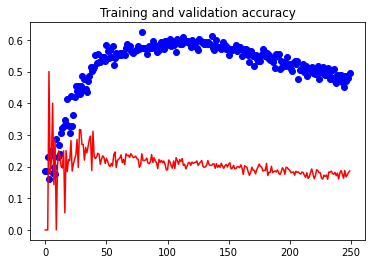

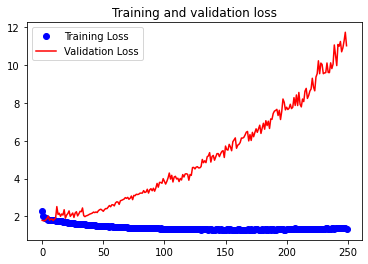

In [136]:
# plot
plot_loss_precision(history)

In [137]:
# Evalute test
model.evaluate(x_test, y_test)

53/53 [==============================] - 0s 4ms/step - loss: 8.3744 - precision: 0.2117


[8.374388694763184, 0.21165919303894043]

In [116]:
# To show what predictions look like
model.predict(x_test)

53/53 [==============================] - 0s 1ms/step


array([[1.0494762e-01, 1.4739588e-01, 1.8581478e-01, 2.1799658e-01,
        1.9442937e-01, 1.4941578e-01],
       [1.1393431e-01, 1.8068825e-01, 1.4190176e-01, 1.8921524e-01,
        2.3002724e-01, 1.4423320e-01],
       [2.2876640e-01, 1.4953500e-01, 1.3485605e-04, 1.7682552e-01,
        4.4467500e-01, 6.3207684e-05],
       ...,
       [1.4977755e-01, 2.7313077e-01, 1.3080984e-01, 2.8060803e-01,
        4.1796719e-03, 1.6149409e-01],
       [1.6465725e-01, 1.7643593e-01, 1.9964154e-01, 2.3889749e-03,
        2.0780353e-01, 2.4907285e-01],
       [1.8987173e-01, 1.2732223e-01, 2.2556774e-01, 3.3468471e-03,
        2.4629787e-01, 2.0759358e-01]], dtype=float32)

In [117]:
# What output should be
y_test

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]])